# Exercises on Sequence Mining

In [1]:
import re
import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import tabulate

import sys
sys.path.append('../utilities')
from utilities.load_data import load_dblp_citations, load_city_tour

## Exercise 1 - Min-hashing

Consider the following matrix:

<table bgcolor="navajowhite" border="5">
<tbody><tr>
<th> </th>
<th>C1</th>
<th>C2</th>
<th>C3</th>
<th>C4</th>
</tr>
<tr>
<td>R1</td>
<td>0</td>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>R2</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr>
<td>R3</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>R4</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>R5</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>R6</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
</tbody></table>

1. Compute the min-hashing value of each of the rows with the permutation: R4, R6, R1, R3, R5, R2. Which of the following statements are true? _Note:_ we give the minhash value in terms of the original name of the row, rather than the order of the row in the permutation.

 - The minhash value for C1 is R5 - Yes
 - The minhash value for C4 is R2 - No
 - The minhash value for C1 is R2 - No
 - The minhash value for C2 is R1 - No



2. Given a data matrix and a permutation return the min-hashing values for each of the columns. 

In [11]:
data = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
])

permutation = np.array([3,5,0,2,4,1])

def signature(data, permutation):
    sign = np.full(np.shape(data)[1], None)
    
    ### YOUR CODE HERE
    for i in range(data.shape[1]):
        for u in permutation:
          if data[u,i] == 1:
             sign[i] = u
             break      

    for row_idx, perm in enumerate(permutation):
       for col_idx, col in enumerate(data[perm]):
            if col ==1 and (sign[col_idx]==None):# or sign[col_idx]> perm):
                sign[col_idx] = perm
    ### YOUR CODE HERE
    
    return sign

sign = signature(data, permutation)

print(sign, "\n")

print("The minhash value for C1 is R5: {0}".format(int(sign[0] == 4)))
print("The minhash value for C4 is R2: {0}".format(int(sign[3] == 1)))
print("The minhash value for C1 is R2: {0}".format(int(sign[0] == 1)))
print("The minhash value for C2 is R1: {0}".format(int(sign[1] == 0)))

[4 5 3 2] 

The minhash value for C1 is R5: 1
The minhash value for C4 is R2: 0
The minhash value for C1 is R2: 0
The minhash value for C2 is R1: 0


### Exercise 2 - Locality Sentity Hashing

Here is a matrix representing the signatures of seven columns, C1 through C7.

<table bgcolor="floralwhite" border="5">
<tbody><tr>
<th>C1 </th>
<th>C2 </th>
<th>C3 </th>
<th>C4 </th>
<th>C5 </th>
<th>C6 </th>
<th>C7 </th>
</tr>
<tr>
<td>1 </td>
<td>2 </td>
<td>1 </td>
<td>1 </td>
<td>2 </td>
<td>5 </td>
<td>4 </td>
</tr>
<tr>
<td>2 </td>
<td>3 </td>
<td>4 </td>
<td>2 </td>
<td>3 </td>
<td>2 </td>
<td>2 </td>
</tr>
<tr>
<td>3 </td>
<td>1 </td>
<td>2 </td>
<td>3 </td>
<td>1 </td>
<td>3 </td>
<td>2 </td>
</tr>
<tr>
<td>4 </td>
<td>1 </td>
<td>3 </td>
<td>1 </td>
<td>2 </td>
<td>4 </td>
<td>4 </td>
</tr>
<tr>
<td>5 </td>
<td>2 </td>
<td>5 </td>
<td>1 </td>
<td>1 </td>
<td>5 </td>
<td>1 </td>
</tr>
<tr>
<td>6 </td>
<td>1 </td>
<td>6 </td>
<td>4 </td>
<td>1 </td>
<td>1 </td>
<td>4 </td>
</tr>
</tbody></table>

Suppose we use locality-sensitive hashing with three bands of two rows each. Assume there are enough buckets available that the hash function for each band can be the identity function (i.e., columns hash to the same bucket if and only if they are identical in the band). Find all the candidate pairs, and then identify one of them in the list below.

 - C1 and C3 [X]
 - C1 and C2
 - C1 and C5
 - C5 and C6


For the first band we get buckets  [C1, C4], [C2,C5], [C3], [C6], [C7]  
For the second band we get buckets [C1,C6], [C2], [C3], [C4], [C5], [C7]  
For the third band we get buckets  [C1,C3], [C2], [C4,C7], [C5], [C6]

In [30]:
data = [
    [1, 2, 1, 1, 2, 5, 4],
    [2, 3, 4, 2, 3, 2, 2],
    [3, 1, 2, 3, 1, 3, 2],
    [4, 1, 3, 1, 2, 4, 4],
    [5, 2, 5, 1, 1, 5, 1],
    [6, 1, 6, 4, 1, 1, 4]
]

potential_pairs = []

### YOUR CODE HERE
bands = [[0,1],[2,3], [4,5]]

band1 = np.array(data[0:2])
band2 = data[2:4]
band3 = data[4:]
# print(band3)

# buckets1 = []
# for i in range(len(band1)):
#     for j in range(i,len(band1)):
#         print(band1[:,i])
#         if np.all(np.array(band1[:,i]),band1[:,j]):
#             buckets1.append([i,j])
#         print()
# print(buckets1)

for band_index in range(0,3):
    row1 = data[band_index*2]
    row2 = data[band_index*2+1]
    for c1_idx in range(0,7):
        for c2_idx in range(c1_idx+1,7):
            if(row1[c1_idx] == row1[c2_idx]) and (row2[c1_idx] == row2[c2_idx]):
                potential_pairs.append("C{a}-C{b}".format(a= c1_idx+1, b= c2_idx+1))

### YOUR CODE HERE
                        
print(potential_pairs)


['C1-C4', 'C2-C5', 'C1-C6', 'C1-C3', 'C4-C7']


### Exercise 3 - Shingling

Find the set of 2-shingles for the "document": **ABRACADABRA**
and also for the "document": **BRICABRAC**

Answer the following questions:

 - How many 2-shingles does ABRACADABRA have?
 - How many 2-shingles does BRICABRAC have?
 - How many 2-shingles do they have in common?
 - What is the Jaccard similarity between the two documents"?

Then, find the true statement in the list below:

 - BRICABRAC has 4 2-shingles.
 - The Jaccard similarity is 5/7.
 - ABRACADABRA has 7 2-shingles.
 - ABRACADABRA has 10 2-shingles.

**ABRACADABRA** has shingles {AB, BR, RA, AC, CA, AD, DA}  
**BRICABRAC** has shingles {BR, RI, IC, CA, AB, RA, AC}  
They have 5 in common.  
Their union has size 9  
Their similarity is 5/9  

In [42]:
doc1 = "ABRACADABRA"
doc2 = "BRICABRAC"

def find_shingles(doc, k=2):
    shingles = []

    ## YOUR CODE HERE
    ee = {(doc[idx], doc[idx+1]) for idx in range(len(doc)-k) }
    #print(ee)
    for i in range(len(doc)-k):
        shingle = doc[i:(i+k)]
        if shingle not in shingles:
            shingles.append(shingle)

    ## YOUR CODE HERE
    
    return shingles

def array_intersection(a, b):
    intersection = []

    ## YOUR CODE HERE
    for shingle in a:
        if shingle in b and shingle not in intersection:
            intersection.append(shingle)
    ## YOUR CODE HERE
    
    return intersection
        

def array_union(a, b):
    union = []    
    
    ## YOUR CODE HERE
    # a = set(a)
    # b = set(b)
    # union = a.union(b)

    union = a.copy()
    for val in b:
        if val not in union:
            union.append(val)
    
    ## YOUR CODE HERE
    
    return union
    
doc1_2_shingles = find_shingles(doc1, k=2)
doc2_2_shingles = find_shingles(doc2, k=2)

doc_intersection = array_intersection(doc1_2_shingles, doc2_2_shingles)
doc_union = array_union(doc1_2_shingles, doc2_2_shingles)

print("{0} 2 shingles: {1}".format(doc1, doc1_2_shingles))
print("{0} 2 shingles: {1}".format(doc2, doc2_2_shingles))
print("Shingles intersection: {0}".format(doc_intersection))
print("Shingles union: {0} \n".format(doc_union))

## Use your implementations and the above print statements to answer the questions


ABRACADABRA 2 shingles: ['AB', 'BR', 'RA', 'AC', 'CA', 'AD', 'DA']
BRICABRAC 2 shingles: ['BR', 'RI', 'IC', 'CA', 'AB', 'RA']
Shingles intersection: ['AB', 'BR', 'RA', 'CA']
Shingles union: ['AB', 'BR', 'RA', 'AC', 'CA', 'AD', 'DA', 'RI', 'IC'] 



## Exercise 4 - Sequence Segmentation
Eurail is designing a new collaborative schedule of itineraries between Lisbon and Stockholm. 
As part of the design, they are facing the following problem: 

We are given a sequence of $N$ cities along the itinerary. 
We need to divide this set of cities into groups of consecutive cities, such that each group contains at least $k$ cities, and the _total sum of the distances_ between the first and the last city in a group, summing over all groups, is **minimized** (note: only the first and the last city in each group matters when calculating this sum of distances).

Assume a generic distance function $dist(city_A, city_B)$ is given.

Design a scheme that quickly finds the best possible division of cities in groups under this minimization objective. 
- Try to make your algorithm as efficient as possible. 
- Provide a complexity expression for it and implement it.

In [43]:
cities, distances = load_city_tour()

# cities is i list of city names
# distances is a distance matris, such that distances[i, j] is the distance from cities[i] to cities[j]

c:\Users\annek\Documents\Github\dm2023-exercises\exercises\utilities\data/city_distances.txt


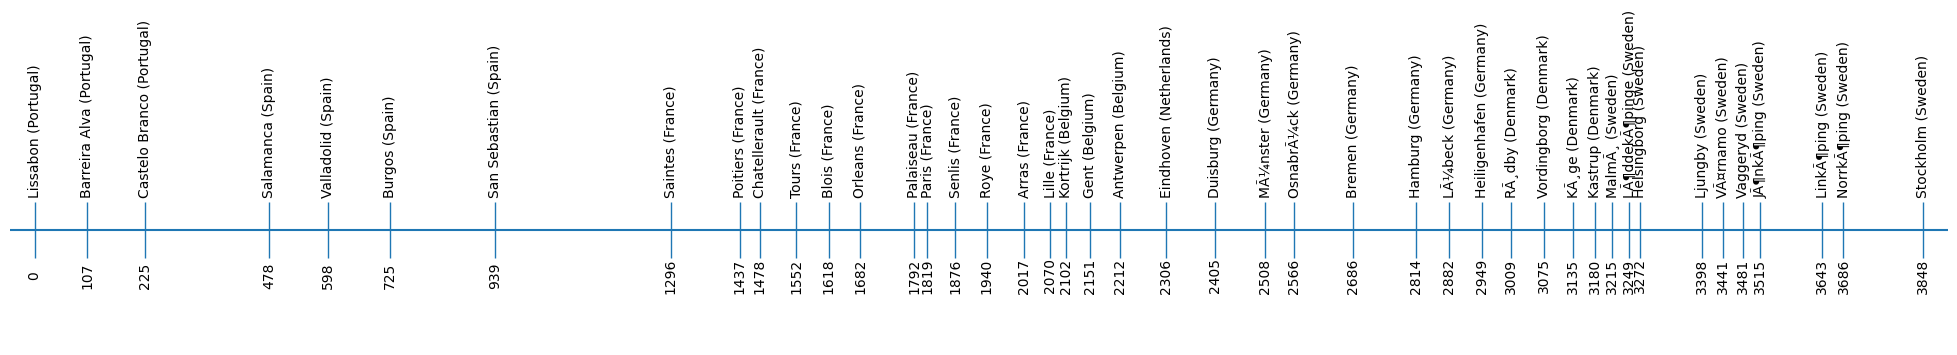

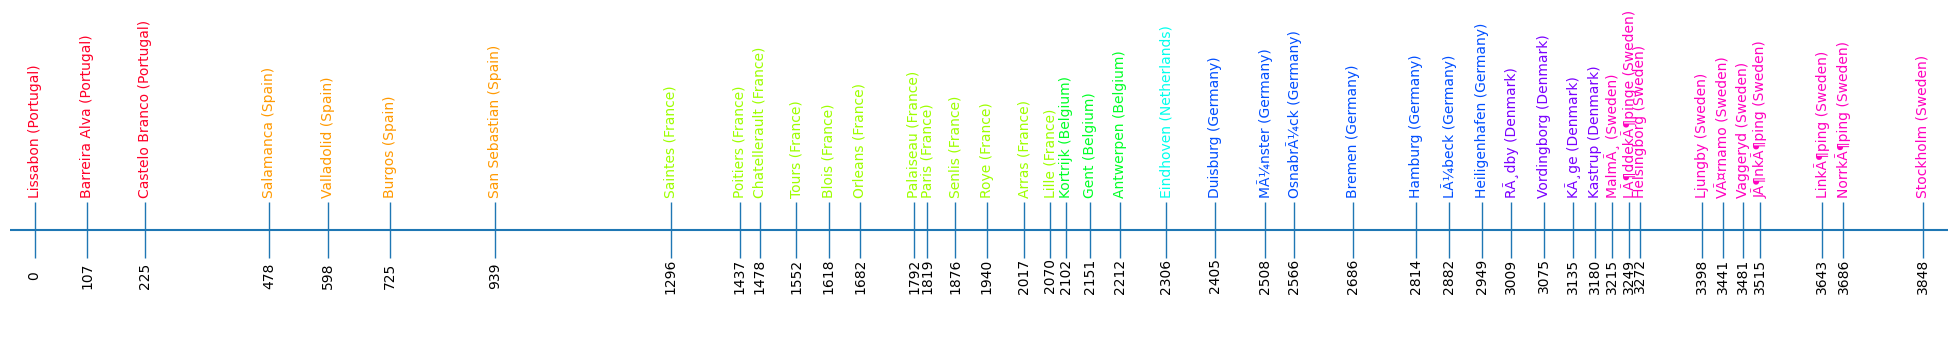

In [44]:
def plot_cities(clusters):
    """
        Function to plot partitioning of the cities.
    """
    d = distances[0]
    dmin = d.min() - 50
    dmax = d.max() + 50

    fig, ax = plt.subplots(figsize=(25,3))

    ax.hlines(1,dmin,dmax)  # Draw a horizontal line
    ax.set_xlim(dmin,dmax)
    ax.set_ylim(0.5,1.5)

    y = np.ones(np.shape(d))   # Make all y values the same
    ax.plot(d,y,'|',ms = 40)  # Plot a line at each location specified in a

    # uniques = np.unique()
    cmap = plt.get_cmap('gist_rainbow')
    uniques = np.unique(clusters)
    if len(uniques) == 1: cdict = dict.fromkeys(uniques, [0., 0., 0.])
    else: 
        cdict = {}
        for i, u in enumerate(uniques):
            cdict[u] = cmap(float(i) / (len(uniques)-1))
    
    for c, pos, cl in zip(cities, d, clusters):
        color = cdict[cl]
        ax.text(pos, 1.15, c, rotation=90, horizontalalignment='center', color=color)
        ax.text(pos, 0.80, "%.0f" % pos, rotation=90, verticalalignment='center', horizontalalignment='center', color=[0., 0., 0.])

    ax.axis('off')
    plt.show()

# Examples of how to plot clusters
# 1: Plot all clusters with same color.
plot_cities(np.zeros((len(cities),)))

# 2: Plot cities according to their country
countries = ["Portugal", "Spain", "France", "Belgium", "Netherlands", "Germany", "Denmark", "Sweden"]
country_dict = {s: i for i, s in enumerate(countries)}
# Extract country from city "name" and look up the cluster in the `country_dict`.
clusters = [country_dict[re.findall('\((\w+)\)', c)[0]] for c in cities]
 
plot_cities(clusters)

C:\Users\annek\AppData\Local\Temp\ipykernel_718284\274618476.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pointers = np.zeros((n//K,n),dtype=np.int)#we need to store what goes with what


[[  inf   inf  225.  478.  598.  725.  939. 1296. 1437. 1478. 1552. 1618.
  1682. 1792. 1819. 1876. 1940. 2017. 2070. 2102. 2151. 2212. 2306. 2405.
  2508. 2566. 2686. 2814. 2882. 2949. 3009. 3075. 3135. 3180. 3215. 3249.
  3272. 3398. 3441. 3481. 3515. 3643. 3686. 3848.]
 [  inf   inf    0.    0.    0.  472.  686. 1043. 1184. 1121. 1195. 1261.
  1325. 1435. 1462. 1519. 1583. 1660. 1713. 1745. 1794. 1855. 1949. 2048.
  2151. 2209. 2329. 2457. 2525. 2592. 2652. 2718. 2778. 2823. 2858. 2892.
  2915. 3041. 3084. 3124. 3158. 3286. 3329. 3491.]
 [  inf   inf    0.    0.    0.    0.    0.    0.  970.  868.  942. 1008.
  1072. 1182. 1209. 1266. 1330. 1407. 1460. 1492. 1541. 1602. 1696. 1795.
  1898. 1956. 2076. 2204. 2272. 2339. 2399. 2465. 2525. 2570. 2605. 2639.
  2662. 2788. 2831. 2871. 2905. 3033. 3076. 3238.]
 [  inf   inf    0.    0.    0.    0.    0.    0.    0.    0.    0. 1110.
   998. 1108. 1135. 1156. 1220. 1297. 1350. 1382. 1431. 1492. 1586. 1685.
  1788. 1846. 1966. 2094. 2152. 2

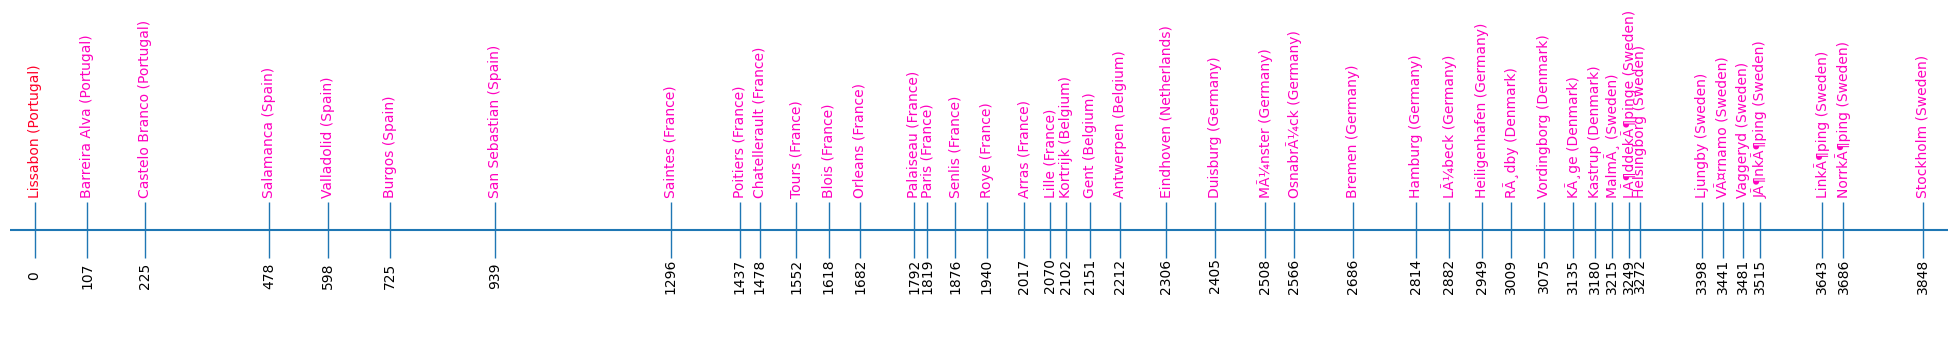

In [53]:
def sequence_segmentation(distances, K=3):
    clusters = np.zeros(distances.shape[0])
    
    ##YOUR CODE HERE
    ### Initialization
    d = lambda i, j: np.abs(distances[j] - distances[i])
    n = distances.shape[0]

    # we want to have segments of at least size k
    # we can ignore the lower traingle part of the matrix 
    # because we can have at most n//k clusters and we want at least three cities
    # and something about what those [i,j] entries are... 

    A = np.zeros(((n//K), n))
    pointers = np.zeros((n//K,n),dtype=np.int)#we need to store what goes with what
    #
    #slicing?
    A[:,:K-1] = np.Infinity

    #first row. start after second city
    A[0,K-1:] = distances[K-1:]

    ### DP
    #
    for l in range(1,n//K): #loop over every row
        #look at previous row
        j_ = l*K-1
        j = (l+1)*K-1 #current?
        A[l,j] = d(j-K+1,j) + A[l-1, j_] #current dist + what we had before?
        # for j in range(K):

    for l in range(1,n//K):
        j = (l+1) * K
        #we want to know from where we are allowed to look '
        start = j - K - 1
        for k in range(j,n): #k is the "diagonal" cell, we only want to look to the right
            m_err = np.Infinity
            m_i = -1 #for storring index
            #we need to look at everything for all candidates that could be looked over?
            #find error and find best?
            for i in range(start, k-K+1): #k-K+1 is the border, we get too close
                #we're only allowed to look a couple of rows up
                err = A[l-1, i] + d(i+1 , k)
                if err < m_err:
                    m_err = err
                    m_i
            #we have found min_error so store
            A[l,k] = m_err 
            pointers[l,K] = m_i #what city we're connected to?

    print(A)

    #min cost. Minimum pairing city for the last city
    min_l = np.argmin(A[:,-1])

    ### Build segment path
    path = []
    k = n-1
    l = min_l
    
    ### Build clusters
    
    while l >= 0:
        path.append(k)
        #check if from the pointers k has changed
        k = pointers[l,k]
        l -=1

    #we need to reverse the path after backtracking
    path = path[::-1]
    # 
    clusters = []
    i=0
    k=0
    for p in path:
        while i <= p:
            clusters.append(k)
            i +=1
        #change k to change cluster¨
        k+=1
    #
    return clusters

d_ = distances[0] #changed from just using distances
plot_cities(sequence_segmentation(d_, K=3))